In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

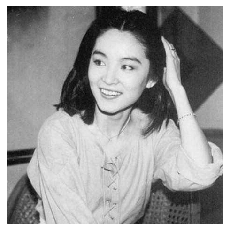

In [52]:
pli_im=Image.open('lqx.jpg').convert('L')#提取图像灰度值
plt.imshow(pli_im,cmap='Greys_r')#显示灰度图像
plt.axis('off')#隐藏坐标轴
pli_im.save("lqx1.jpg")

[[ 38  34  31 ... 133 133 133]
 [ 37  33  29 ... 132 132 132]
 [ 38  33  29 ... 132 132 132]
 ...
 [ 60  68  66 ...  79  79  79]
 [ 69  76  71 ...  82  82  82]
 [ 61  68  68 ...  82  83  84]]


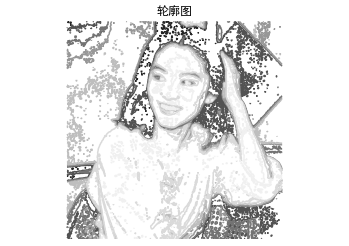

In [62]:
pli_im=np.array(Image.open('lqx1.jpg').convert('L'))#提取图像灰度值
plt.rcParams['font.sans-serif']=['SimHei']#正常显示中文
plt.figure()
plt.axis('equal')
plt.axis('off')
plt.title('轮廓图')
plt.contour(pli_im,origin='image',cmap='Greys_r')
plt.show()

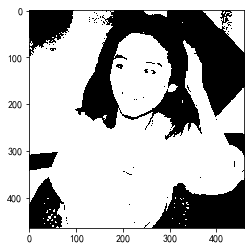

In [63]:
img=Image.open('lqx1.jpg').convert('L')
threshold =120  #阈值
table = []
for i in range(256):
    if i < threshold:
        table.append(0)
    else:
        table.append(1)
photo = img.point(table) #二值化处理
plt.imshow(photo,cmap='Greys_r')
plt.show()

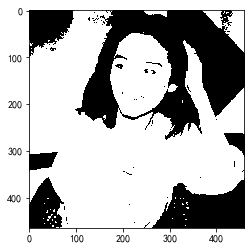

In [64]:
pli_im=np.array(Image.open('lqx.jpg').convert('L'),'f')#提取图像灰度值
threshold =120.0  #阈值
for i in range(pli_im.shape[0]):
    for j in range(pli_im.shape[1]):
        if pli_im[i,j]>threshold:
            pli_im[i,j]=1.0
        else:
            pli_im[i,j]=0.0
plt.imshow(pli_im,cmap='Greys_r')
plt.show()

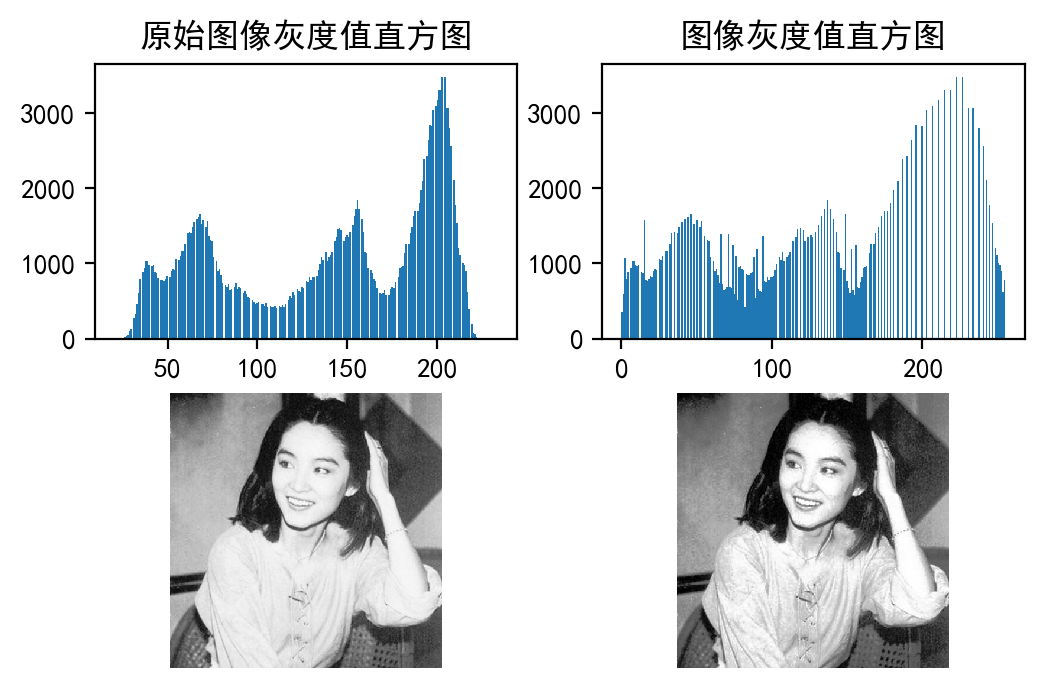

In [65]:
pli_im=np.array(Image.open('lqx.jpg').convert('L'),'f')#提取图像灰度值
plt.rcParams['font.sans-serif']=['SimHei']#正常显示中文


clo_num=np.zeros(256)
for i in range(pli_im.shape[0]):
    for j in range(pli_im.shape[1]):
        clo_num[int(pli_im[i,j])]+=1
pic_len=pli_im.shape[0]*pli_im.shape[1]
clo_sum=clo_num.cumsum() #累计分布
clo_prob=clo_sum/pic_len#累计概率分布

new_img=np.array([[0]*pli_im.shape[1]]*pli_im.shape[0])
for i in range(pli_im.shape[0]):
    for j in range(pli_im.shape[1]):
        new_img[i,j]=int(255*clo_prob[int(pli_im[i,j])]+0.5) #直方图均衡化
plt.figure(dpi=200)
plt.subplot(221)
plt.title('原始图像灰度值直方图')
plt.hist(pli_im.flatten(),256)

plt.subplot(222)
plt.title('图像灰度值直方图')
plt.hist(new_img.flatten(),256)

plt.subplot(223)
plt.imshow(pli_im,cmap='Greys_r')
plt.axis('off')

plt.subplot(224)
plt.imshow(new_img,cmap='Greys_r')
plt.axis('off')
plt.show()


In [9]:
pli_im=Image.open('lqx.jpg').convert('L')#提取图像灰度值
table=list(range(256))

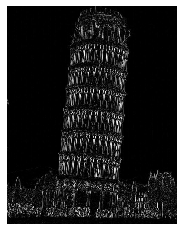

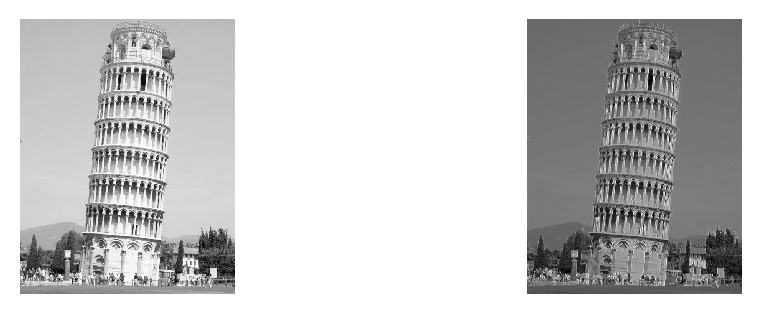

In [39]:
from scipy.ndimage import filters
pli_im=np.array(Image.open('building.jpg').convert('L'),'f')#提取图像灰度值
imx = np.zeros(pli_im.shape)

#sobel算子
filters.sobel(pli_im,1,imx) # 1 为x方向导数
imy = np.zeros(pli_im.shape)
filters.sobel(pli_im,0,imy)# 0 为y方向导数

magnitude=np.sqrt(imx**2,imy**2)
magnitude=magnitude/np.max(magnitude)*255 #设置灰度值取值范围

plt.imshow(magnitude,cmap='Greys_r')
plt.axis('off')
plt.show()

plt.figure(dpi=200)
plt.subplot(221)
plt.axis('off')
plt.imshow(pli_im,cmap='Greys_r')
plt.subplot(222)
pli_im=pli_im+magnitude
pli_im=(pli_im-np.min(pli_im))/(np.max(pli_im)-np.min(pli_im))*255 #设置灰度值取值范围

plt.axis('off')
plt.imshow(pli_im,cmap='Greys_r')
plt.show()
